In [1]:
# Required packages:
library(SCopeLoomR)
library(AUCell)
library(SCENIC)

# For some of the plots:
#library(dplyr)
library(KernSmooth)
library(RColorBrewer)
library(plotly)
library(BiocParallel)
library(grid)
library(ComplexHeatmap)
library(data.table)
library(gprofiler2)
library(stringr)
library(dplyr)
library(tibble)
library(ggrepel)


Attachement du package : ‘SCopeLoomR’


L'objet suivant est masqué depuis ‘package:base’:

    flush



Attachement du package : ‘SCENIC’


L'objet suivant est masqué depuis ‘package:AUCell’:

    plotEmb_rgb


KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Le chargement a nécessité le package : ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly exp

In [2]:
getwd()

[1] "/work/adufour/notebook/scenic/visualisation_resultats"

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [4]:
setwd("/home/adufour/work/scenic/scenic_pig/direct_annot_v6/out")

In [5]:
load("/home/adufour/work/rds_storage/SCENIC/scenic_heatmap.RData")

In [6]:
cluster_info <- read.csv(file = '/home/adufour/work/notebook/scenic/preparation/cell_type_annotation_2.csv')

In [7]:
colnames(cluster_info) <- c("index", "cell", "cluster")

In [8]:
time <- read.csv(file = '/home/adufour/work/notebook/scenic/preparation/time.csv')

In [9]:
colnames(time) <- c("index", "cell", "time")

In [10]:
cellInfo <- merge(cluster_info,time,by="cell")

In [11]:
rownames(cellInfo) <- cellInfo$cell

In [12]:
cellInfo$time_type <-paste(cellInfo$time,cellInfo$cluster,sep="_")

In [13]:
regulonAUC <- getAUC(regulonAUC)[,cellInfo$cell]

In [14]:
rss <- calcRSS(AUC=regulonAUC, cellAnnotation=cellInfo[colnames(regulonAUC),"time_type"])

In [15]:
saveRDS(rss, file = "/home/adufour/work/rds_storage/SCENIC/scenic_rss.rds") 

In [16]:
rss

,J9_Endoderme,J11_Endoderme 1,J11_Trophectoderme 1,J5_ICM,J7_Trophectoderme,J9_Epiblaste,J9_Trophectoderme 1,J5_Trophectoderme,J9_Trophectoderme 3,J7_Endoderme,J11_Endoderme 2,J11_Trophectoderme 2,J9_Trophectoderme 2,J11_Mesendoderme,J11_Endoderme 3,J11_Trophectoderme 3,J7_Epiblaste,J11_Epiblaste
MAFG (+),0.187000581,1.356257e-01,2.005468e-01,0.024664364,0.100852318,0.025663270,0.1105311917,0.051413558,0.076189625,0.061299600,0.1024954709,4.083470e-02,0.077511935,9.426653e-03,5.960955e-02,0.018920969,0.022815142,1.422131e-02
YBX1 (+),0.202574856,1.481191e-01,2.168706e-01,0.011352643,0.090152288,0.025951275,0.1172010538,0.047806005,0.056971456,0.069933698,0.0910915131,4.508849e-02,0.091508894,9.210373e-03,6.172662e-02,0.015613239,0.020236189,1.410373e-02
GFI1B (+),0.070623104,5.028225e-02,4.158913e-02,0.033371199,0.083566889,0.018990370,0.0343296418,0.041765570,0.072896076,0.023594254,0.0687590771,1.312561e-02,0.024310860,6.442691e-03,1.524795e-02,0.025321564,0.010854072,6.254716e-03
TEAD4 (+),0.088881158,4.315842e-02,3.175835e-02,0.017905448,0.049302581,0.014038427,0.0320944811,0.022819398,0.037663482,0.050818141,0.0498126436,1.711013e-02,0.025655888,1.020309e-02,3.447741e-02,0.010692851,0.016476212,7.231562e-03
ZNF148 (+),0.146495513,1.391721e-01,2.070376e-01,0.043279515,0.109500459,0.023514641,0.1043716388,0.068365673,0.079811789,0.055964256,0.0908024777,4.155116e-02,0.068349899,8.336870e-03,5.359918e-02,0.023975181,0.024277118,1.311545e-02
EGR3 (+),0.204078425,1.718336e-01,1.977219e-01,0.013843494,0.082102014,0.021141200,0.1069288651,0.041722425,0.058871024,0.065281844,0.1215319765,3.910662e-02,0.067946526,9.811929e-03,6.390096e-02,0.019531411,0.017828212,1.347385e-02
KLF15 (+),0.186068295,1.428991e-01,1.792118e-01,0.011988491,0.071510653,0.022621195,0.0955890890,0.037999417,0.055758579,0.056047058,0.1046791821,3.669352e-02,0.061980944,1.187328e-02,6.406899e-02,0.016451272,0.018677676,1.420945e-02
ZBTB46 (+),0.105920566,5.482051e-02,9.097624e-02,0.018985213,0.061729405,0.024910871,0.0782073976,0.056585863,0.051992792,0.056508681,0.0493960597,2.679786e-02,0.049357961,8.502984e-03,2.832215e-02,0.013407410,0.031318620,9.365619e-03
HOXA7 (+),0.005568256,3.488058e-03,8.508816e-04,0.039958456,0.005389290,0.009402169,0.0045429568,0.013612453,0.001077018,0.002169710,0.0020878535,2.981266e-04,0.000000000,1.097501e-02,1.015035e-03,0.000000000,0.014067562,7.117820e-03
BACH2 (+),0.053905928,3.207524e-02,3.674591e-02,0.023192936,0.074349878,0.012393713,0.0332767224,0.026333992,0.069772601,0.026302483,0.0448975148,1.215912e-02,0.022857778,5.914636e-03,2.319095e-02,0.013074181,0.011132898,6.399275e-03


In [17]:
filter_rss <- rss %>%
    as.data.frame() %>%
    mutate(regulons = rownames(rss)) %>%
    reshape2::melt(id.vars = 'regulons') %>%
    arrange_(~ desc(value)) %>%
    group_by_(~ variable) %>%
    slice(1:20)

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“`arrange_()` was deprecated in dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [18]:
saveRDS(filter_rss, file = "/home/adufour/work/rds_storage/SCENIC/regulons_filterby_rss.rds") 

Showing regulons and cell types with any RSS > 0.01 (dim: 214x18)

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



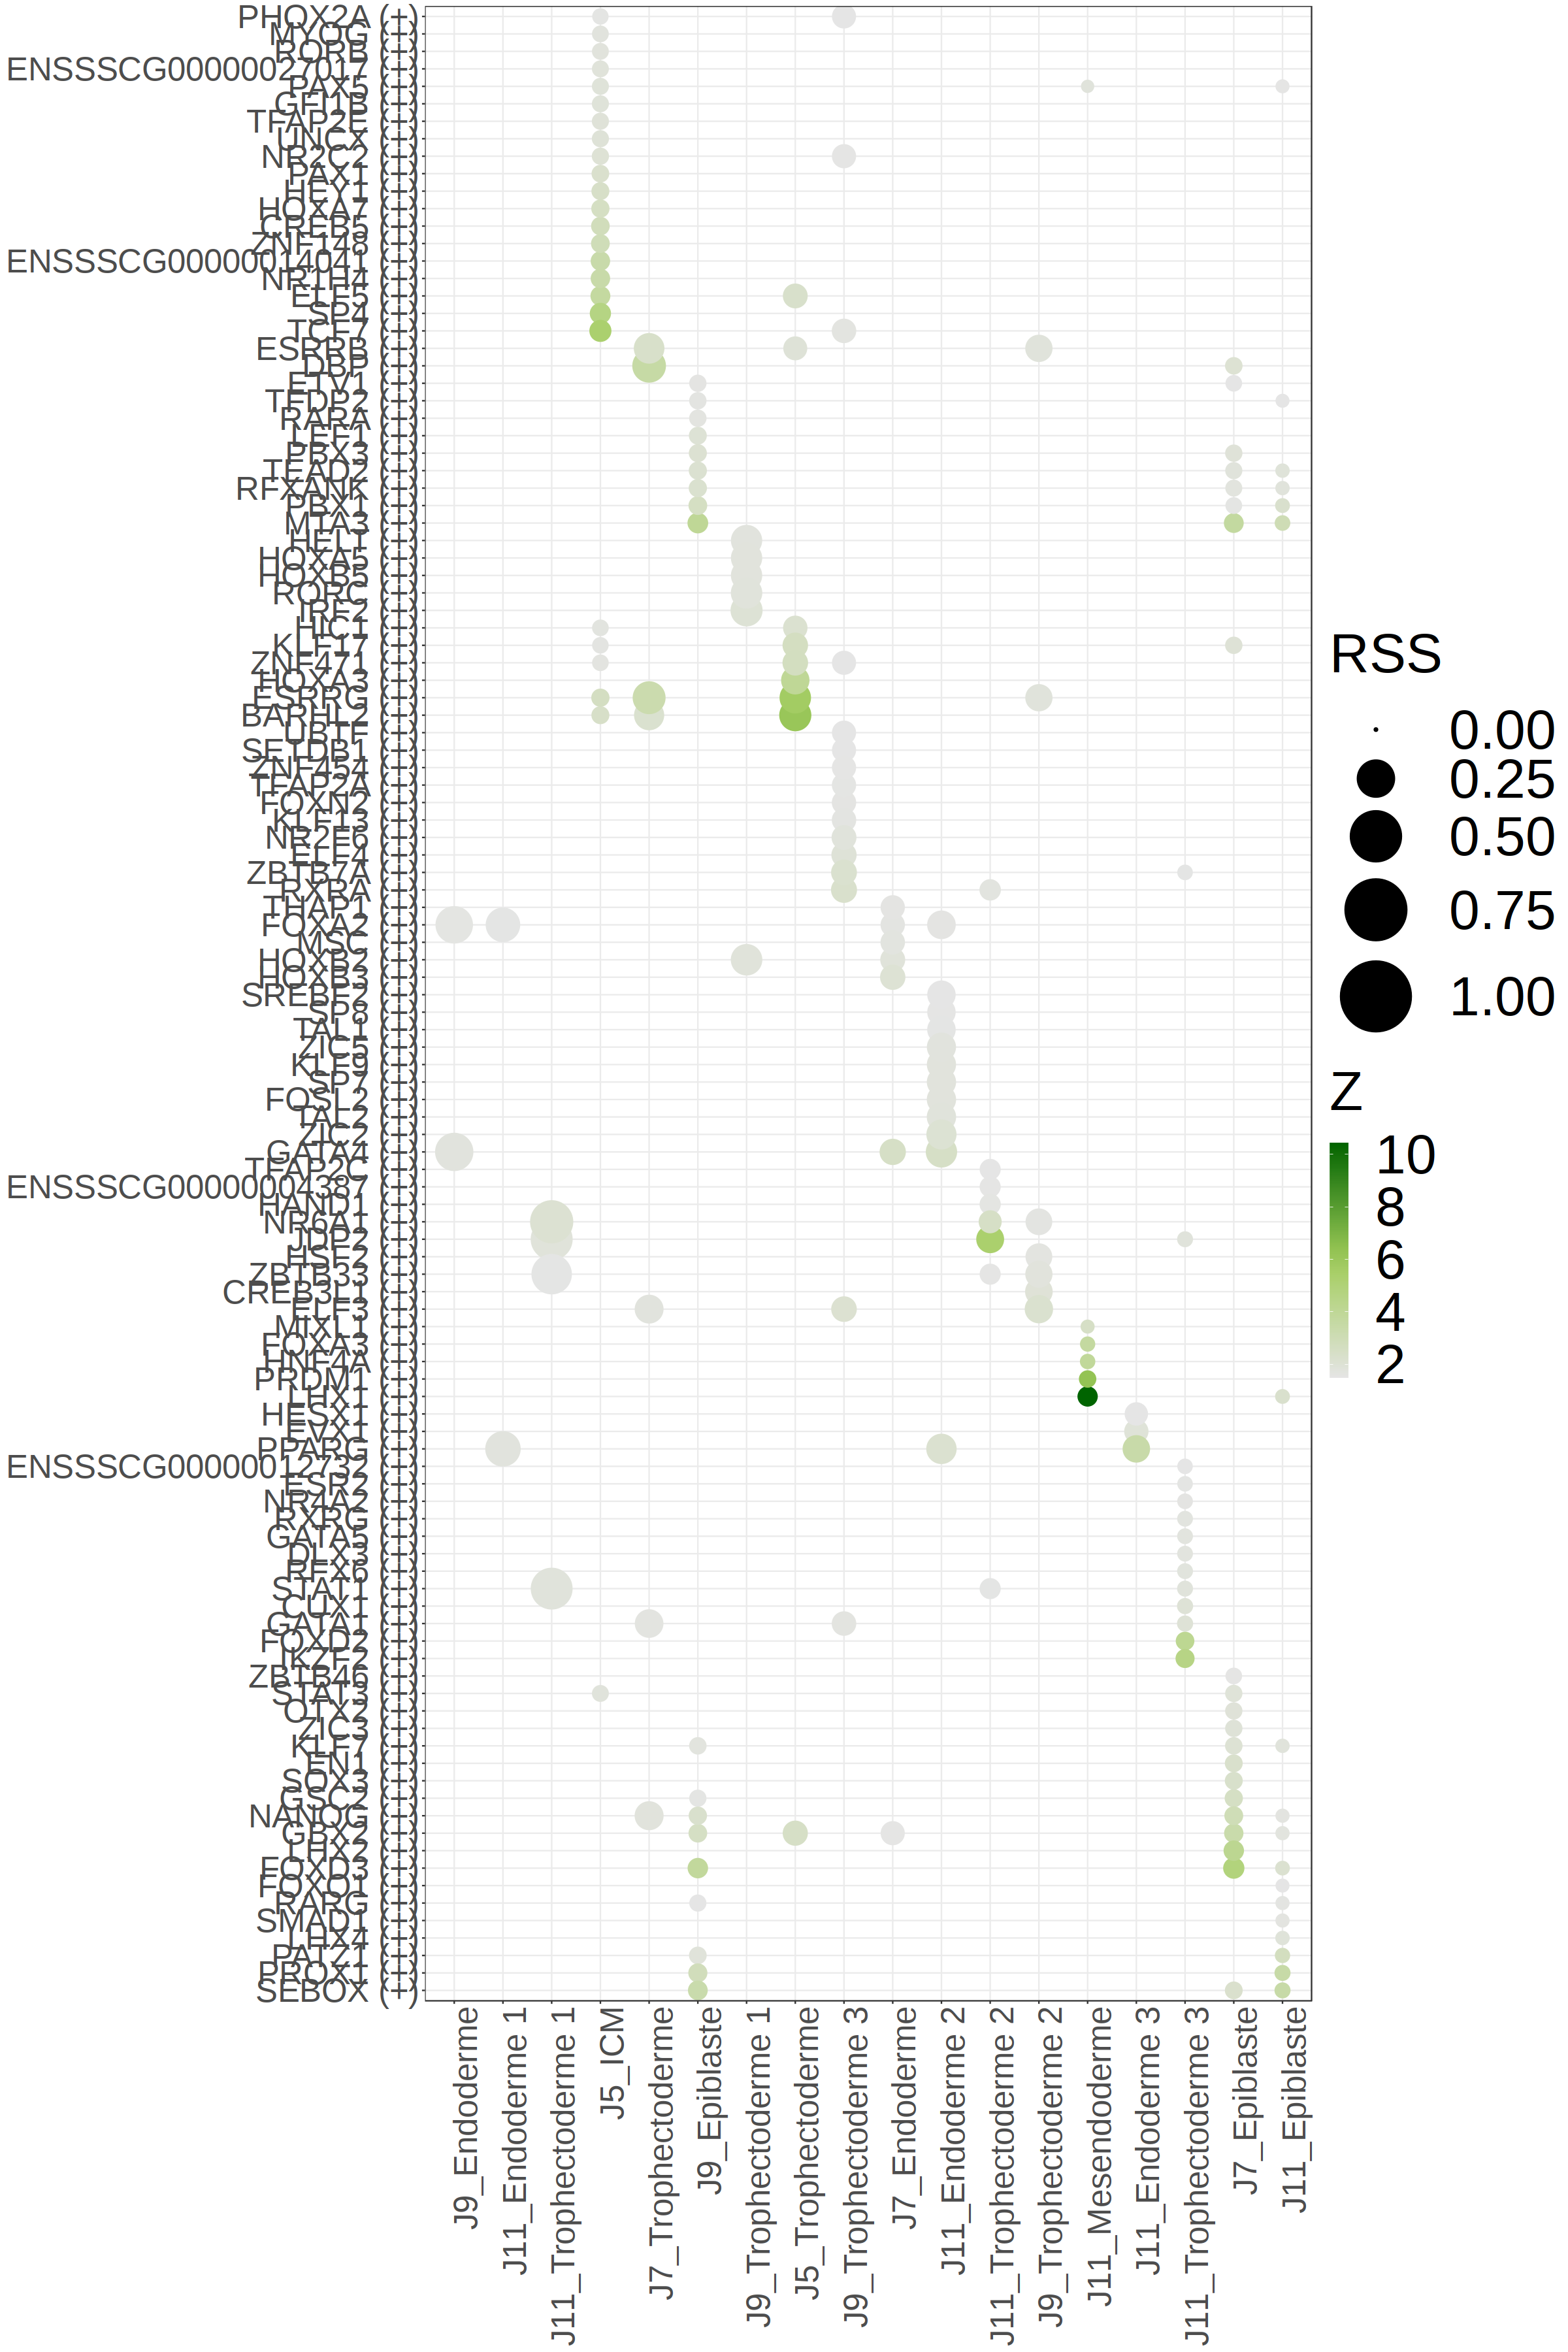

In [19]:
rssPlot <- plotRSS(rss)
options(repr.plot.width=20, repr.plot.height=30) # To set the figure size in Jupyter
rssPlot$plot +
    scale_size( limits = c(0, 1), range = c(1, 30)) + 
    theme(legend.position = 'right',legend.title = element_text(size = 50),
        legend.text = element_text(size = 50),
        axis.text=element_text(size=30),
        axis.title=element_text(size=48,face="bold"),
        legend.key.height=unit(3,"line"))

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


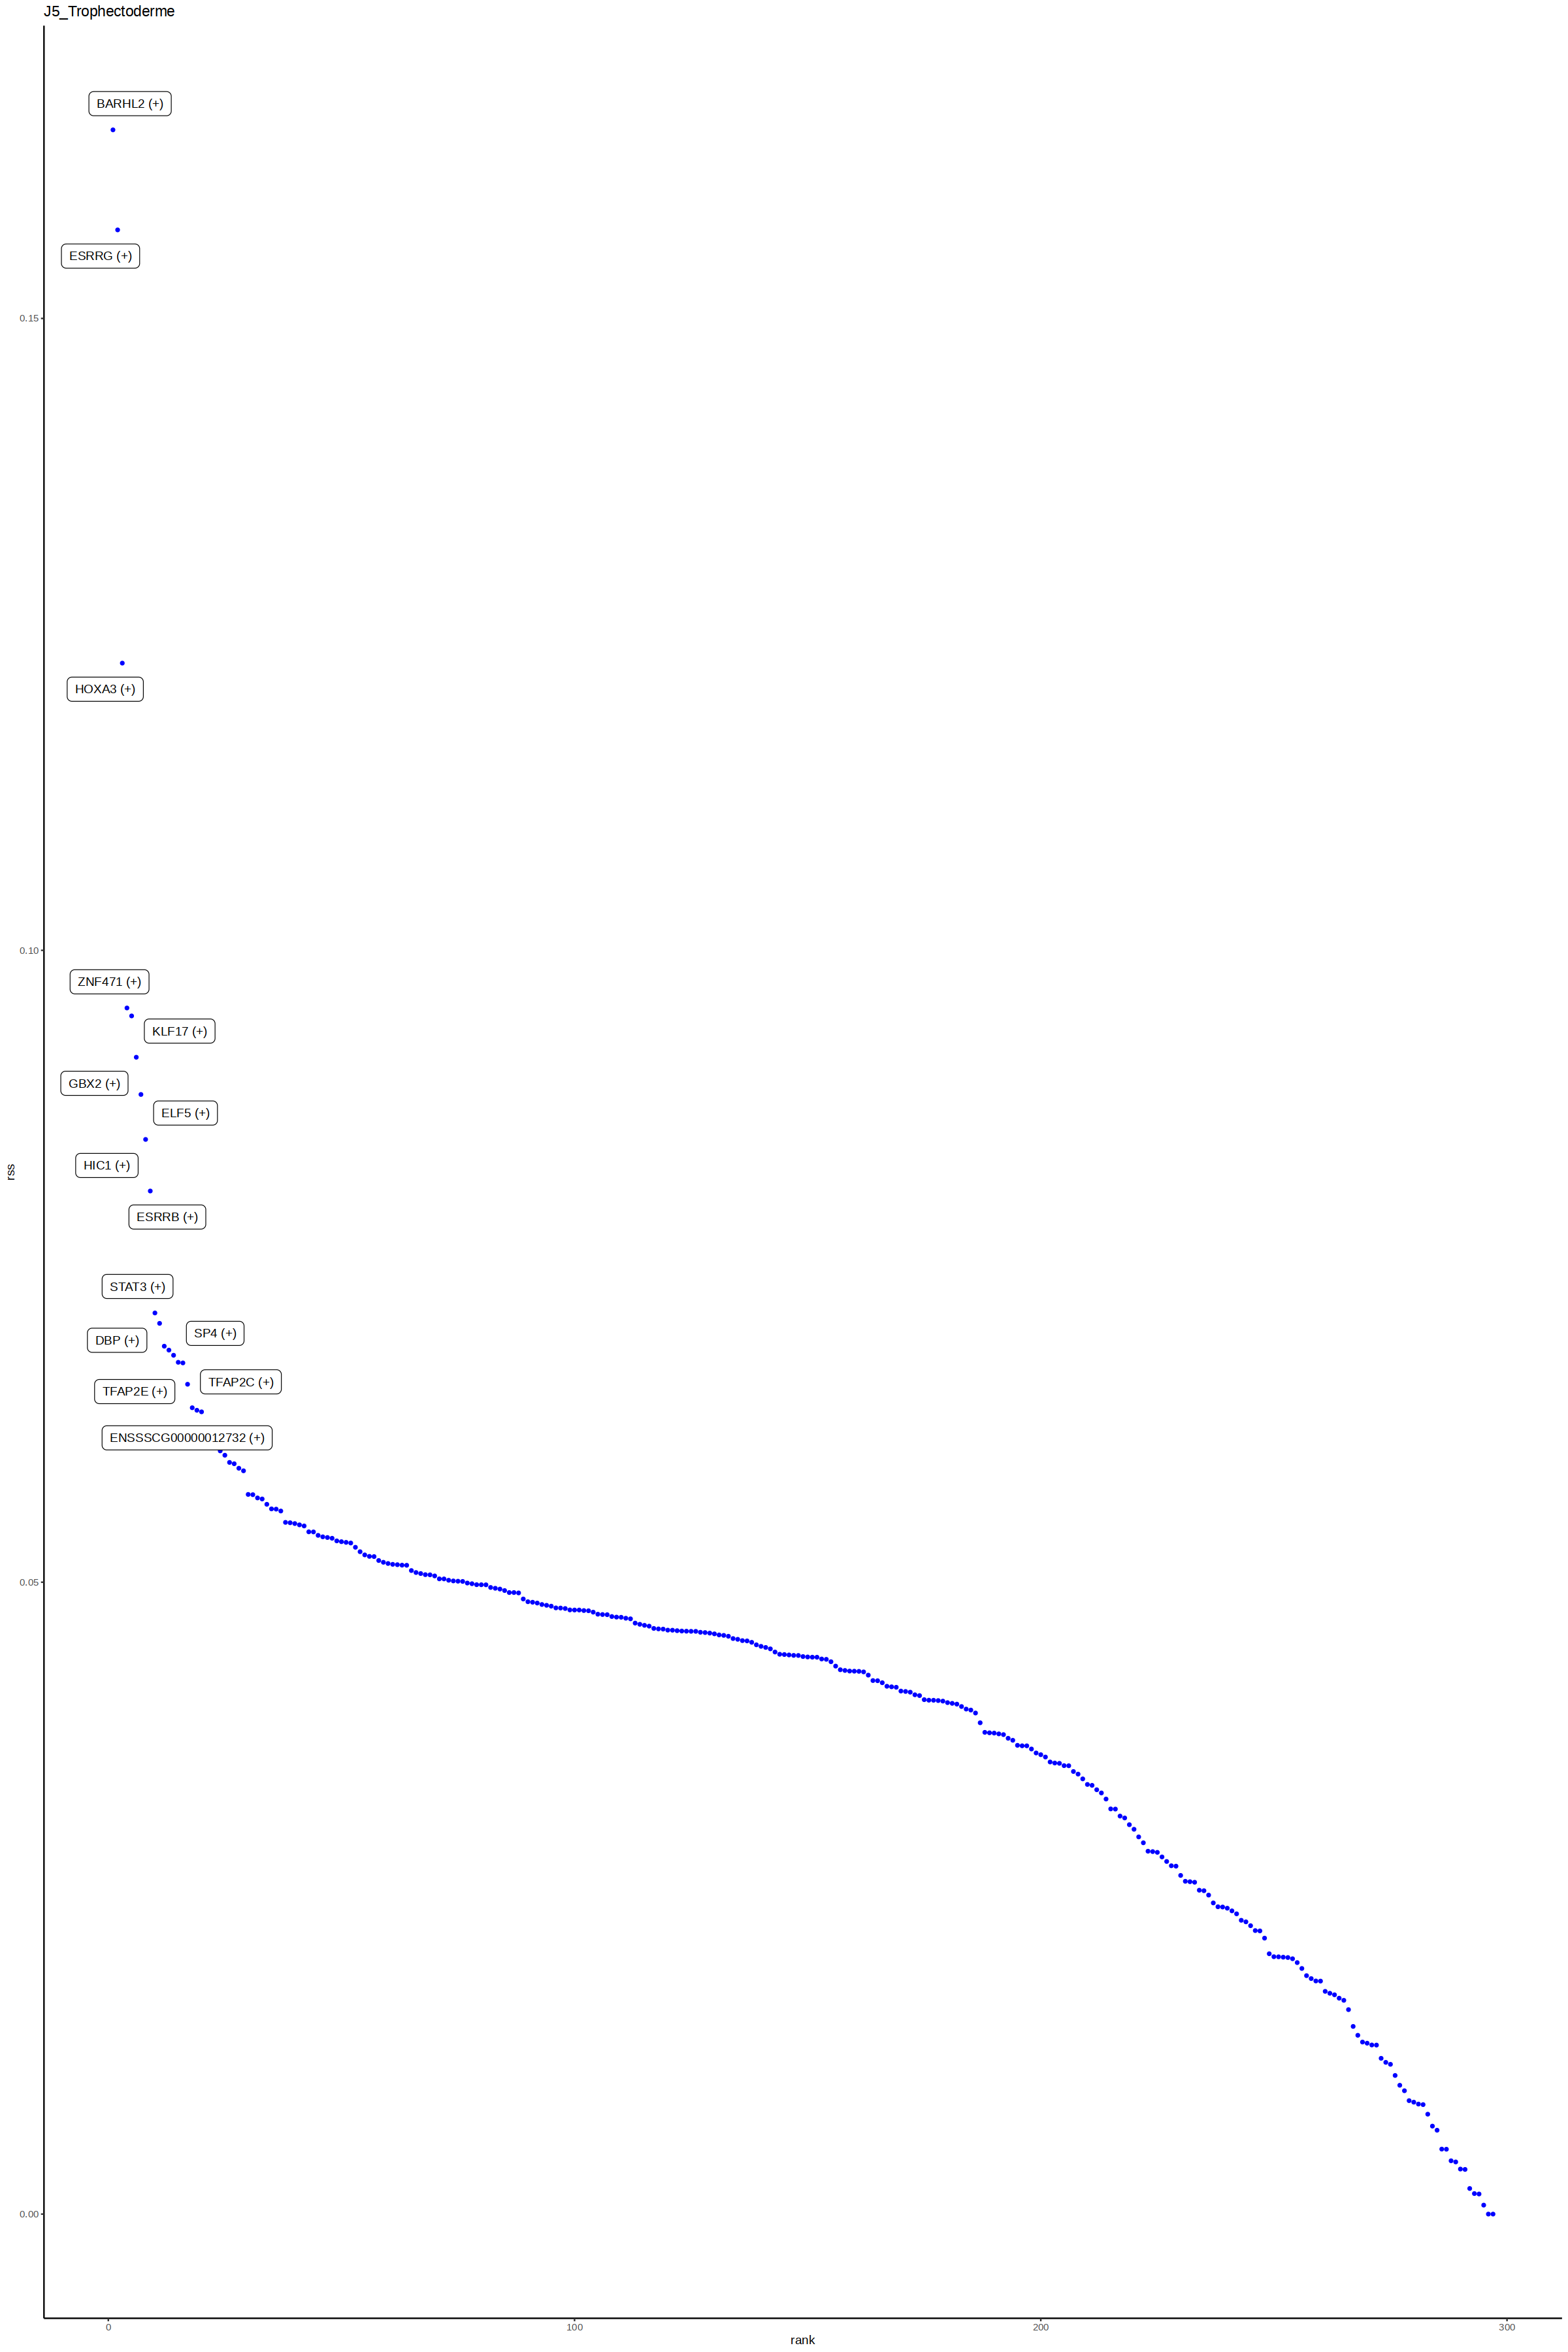

In [20]:
plotRSS_oneSet(rss, setName = "D5_Trophectoderm", n = 20) # cluster ID

In [21]:
options(repr.plot.width=20, repr.plot.height=25) # To set the figure size in Jupyter
p <- plotRSS_oneSet(rss, setName = "D5_Trophectoderm", n = 20) # cluster ID
ggsave('/home/adufour/work/notebook/plots/scenic/rss_trophectoderm.png', p, height = 8, width = 8)

ERROR: Error in rss[, setName]: indice hors limites
